In [4]:
import os
import pandas as pd
import numpy as np

import sys
from datetime import datetime
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('./ukb_func')
import plot_results
import importlib
import ukb_utils
import utils

from sklearn.metrics import f1_score, fbeta_score, recall_score, brier_score_loss, log_loss
from sklearn.calibration import calibration_curve

# Set font properties
plt.rcParams.update({
    'font.size': 12,       # Set font size
    'font.weight': 'bold'  # Set font weight to bold
})

In [73]:
def plot_calibration_curve(lab, prob):
    y_true = np.concatenate(lab)
    y_prob = np.concatenate(prob)

    # Compute Brier score
    brier_score = brier_score_loss(y_true, y_prob)
    print(f'Brier Score: {brier_score}')

    # Compute Log Loss
    log_loss_score = log_loss(y_true, y_prob)
    print(f'Log Loss: {log_loss_score}')

    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=100)
    plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
    plt.xlabel('Predicted probability')
    plt.ylabel('True probability')
    plt.title('Calibration Curve')
    plt.legend()
    plt.show()

    # Expected Calibration Error (ECE)
    ece = np.sum(np.abs(prob_true - prob_pred) * len(y_true) / len(y_prob))
    print(f'Expected Calibration Error (ECE): {ece}')

    # Maximum Calibration Error (MCE)
    mce = np.max(np.abs(prob_true - prob_pred))
    print(f'Maximum Calibration Error (MCE): {mce}')

In [88]:
path = '../results/dementia/proteomics/'
experiment = 'proteins_only'
df1 = pd.read_csv(f'{path}/{experiment}/roc_auc/test_results.csv')
df2 = pd.read_csv(f'{path}/{experiment}/f3/test_results.csv')

In [89]:
df1

,Unnamed: 0,model,hyperparams,auroc,avg_prec,threshold,TP,TN,FP,FN,accuracy,bal_acc,prec_n,prec_p,recall_n,recall_p,f1_n,f1_p
0,0,lgbm,"{'n_estimators': 1075, 'num_leaves': 5, 'min_c...",0.831496,0.265840,0.057833,65.0,3597.0,411.0,56.0,0.886898,0.717323,0.984670,0.136555,0.897455,0.537190,0.939042,0.217755
1,1,xgb_limitdepth,"{'n_estimators': 138, 'max_depth': 6, 'min_chi...",0.886444,0.211672,0.048321,112.0,6564.0,801.0,48.0,0.887176,0.795621,0.992740,0.122673,0.891242,0.700000,0.939257,0.208760
2,2,lgbm,"{'n_estimators': 1162, 'num_leaves': 4, 'min_c...",0.868116,0.200200,0.059325,112.0,5524.0,563.0,70.0,0.899027,0.761446,0.987487,0.165926,0.907508,0.615385,0.945809,0.261377
3,3,xgb_limitdepth,"{'n_estimators': 573, 'max_depth': 11, 'min_ch...",0.860464,0.258662,0.137293,56.0,8052.0,59.0,217.0,0.967080,0.598927,0.973757,0.486957,0.992726,0.205128,0.983150,0.288660
4,4,lgbm,"{'n_estimators': 2774, 'num_leaves': 7, 'min_c...",0.891241,0.236088,0.175236,19.0,3571.0,44.0,78.0,0.967134,0.591852,0.978624,0.301587,0.987828,0.195876,0.983205,0.237500
5,5,xgb_limitdepth,"{'n_estimators': 573, 'max_depth': 9, 'min_chi...",0.856922,0.196437,0.278728,3.0,3841.0,4.0,102.0,0.973165,0.513766,0.974131,0.428571,0.998960,0.028571,0.986389,0.053571
6,6,lgbm,"{'n_estimators': 1448, 'num_leaves': 8, 'min_c...",0.834828,0.230881,0.795759,3.0,3819.0,0.0,103.0,0.973758,0.514151,0.973738,1.000000,1.000000,0.028302,0.986694,0.055046
7,7,xgb_limitdepth,"{'n_estimators': 623, 'max_depth': 11, 'min_ch...",0.834572,0.150060,0.124584,8.0,2091.0,31.0,43.0,0.965946,0.571127,0.979850,0.205128,0.985391,0.156863,0.982613,0.177778
8,8,lgbm,"{'n_estimators': 3781, 'num_leaves': 27, 'min_...",0.847692,0.191230,0.959963,0.0,4456.0,0.0,104.0,0.977193,0.500000,0.977193,0.000000,1.000000,0.000000,0.988465,0.000000
9,9,xgb_limitdepth,"{'n_estimators': 93, 'max_depth': 7, 'min_chil...",0.885018,0.295312,0.040092,192.0,6810.0,1264.0,62.0,0.840778,0.799677,0.990978,0.131868,0.843448,0.755906,0.911281,0.224561


In [10]:
df2

,Unnamed: 0,model,hyperparams,auroc,avg_prec,threshold,TP,TN,FP,FN,accuracy,bal_acc,prec_n,prec_p,recall_n,recall_p,f3_n,f3_p
0,0,lgbm,"{'n_estimators': 4, 'num_leaves': 4, 'min_chil...",0.766296,0.084532,0.032725,83.0,2946.0,1062.0,38.0,0.733592,0.710490,0.987265,0.072489,0.735030,0.685950,0.754302,0.371531
1,1,lgbm,"{'n_estimators': 4, 'num_leaves': 4, 'min_chil...",0.796628,0.070046,0.033397,109.0,5777.0,1588.0,51.0,0.782193,0.732818,0.991249,0.064231,0.784386,0.681250,0.801104,0.347466
2,2,lgbm,"{'n_estimators': 4, 'num_leaves': 4, 'min_chil...",0.777652,0.078773,0.032201,125.0,4555.0,1532.0,57.0,0.746531,0.717565,0.987641,0.075438,0.748316,0.686813,0.766900,0.379363
3,3,lgbm,"{'n_estimators': 4, 'num_leaves': 4, 'min_chil...",0.791843,0.094763,0.032240,191.0,6127.0,1984.0,82.0,0.753578,0.727514,0.986793,0.087816,0.755394,0.699634,0.773533,0.412349
4,4,lgbm,"{'n_estimators': 4, 'num_leaves': 4, 'min_chil...",0.821620,0.095252,0.033070,74.0,2744.0,871.0,23.0,0.759159,0.760973,0.991688,0.078307,0.759059,0.762887,0.777293,0.407041
5,5,lgbm,"{'n_estimators': 4, 'num_leaves': 4, 'min_chil...",0.779728,0.070992,0.033049,68.0,2915.0,930.0,37.0,0.755190,0.702873,0.987466,0.068136,0.758127,0.647619,0.776154,0.349974
6,6,lgbm,"{'n_estimators': 4, 'num_leaves': 4, 'min_chil...",0.796910,0.084365,0.033493,73.0,2906.0,913.0,33.0,0.758981,0.724806,0.988772,0.074037,0.760932,0.688679,0.778880,0.376289
7,7,lgbm,"{'n_estimators': 4, 'num_leaves': 4, 'min_chil...",0.795619,0.075579,0.032573,33.0,1674.0,448.0,18.0,0.785550,0.717969,0.989362,0.068607,0.788878,0.647059,0.805195,0.351064
8,8,lgbm,"{'n_estimators': 4, 'num_leaves': 4, 'min_chil...",0.788698,0.073499,0.038982,62.0,3569.0,887.0,42.0,0.796272,0.698548,0.988369,0.065332,0.800943,0.596154,0.816425,0.328912
9,9,lgbm,"{'n_estimators': 4, 'num_leaves': 4, 'min_chil...",0.796539,0.096592,0.031612,184.0,6056.0,2018.0,70.0,0.749280,0.737236,0.988573,0.083560,0.750062,0.724409,0.768606,0.409982


Brier Score: 0.02407105564547634
Log Loss: 0.10513566548379144


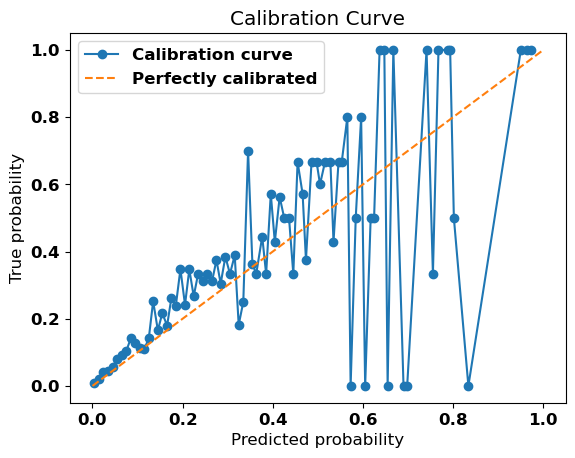

Expected Calibration Error (ECE): 12.018264023898759
Maximum Calibration Error (MCE): 0.8337041875106938


In [86]:
lab = pickle.load(open(f'{path}/{experiment}/roc_auc/test_true_labels.pkl', 'rb'))
prob = pickle.load(open(f'{path}/{experiment}/roc_auc/test_probas.pkl', 'rb'))
# for i,t in enumerate(df1.threshold):
#     pred = (prob[i] >= t).astype(int)
#     # print(f1_score(lab[i], pred))
#     # print(recall_score(lab[i], pred))
#     print(fbeta_score(lab[i], pred, beta=3))
plot_calibration_curve(lab, prob)

Brier Score: 0.0320961551822745
Log Loss: 0.17031194214770062


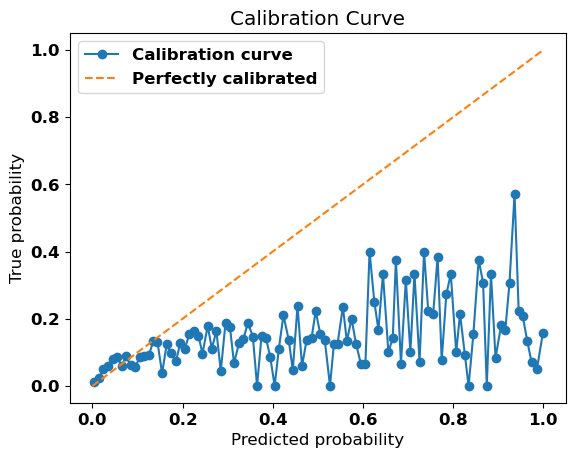

Expected Calibration Error (ECE): 35.18769428601639
Maximum Calibration Error (MCE): 0.935751653609987


In [87]:
lab = pickle.load(open(f'{path}/{experiment}/f3/test_true_labels.pkl', 'rb'))
prob = pickle.load(open(f'{path}/{experiment}/f3/test_probas.pkl', 'rb'))
# for i,t in enumerate(df2.threshold):
#     pred = (prob[i] >= t).astype(int)
#     # print(f1_score(lab[i], pred))
#     # print(recall_score(lab[i], pred))
#     print(fbeta_score(lab[i], pred, beta=3))
plot_calibration_curve(lab, prob)

(array([[1.934e+03, 6.430e+02, 4.070e+02, 4.220e+02, 1.940e+02, 1.470e+02,
         3.550e+02, 0.000e+00, 0.000e+00, 2.700e+01],
        [3.626e+03, 1.836e+03, 9.820e+02, 2.810e+02, 4.960e+02, 3.040e+02,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 1.228e+03, 2.754e+03, 6.300e+02, 8.090e+02, 0.000e+00,
         5.210e+02, 2.770e+02, 0.000e+00, 5.000e+01],
        [4.960e+03, 1.249e+03, 7.520e+02, 3.710e+02, 3.300e+02, 3.100e+02,
         3.620e+02, 0.000e+00, 0.000e+00, 5.000e+01],
        [2.121e+03, 4.890e+02, 3.020e+02, 2.930e+02, 1.580e+02, 1.700e+02,
         1.610e+02, 0.000e+00, 1.800e+01, 0.000e+00],
        [1.781e+03, 1.361e+03, 1.820e+02, 1.600e+02, 2.790e+02, 1.620e+02,
         2.500e+01, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.929e+03, 4.310e+02, 3.880e+02, 3.720e+02, 1.750e+02, 3.080e+02,
         1.270e+02, 1.630e+02, 3.200e+01, 0.000e+00],
        [1.258e+03, 4.340e+02, 8.400e+01, 1.770e+02, 9.000e+01, 7.200e+01,
         5.400e+01, 0.

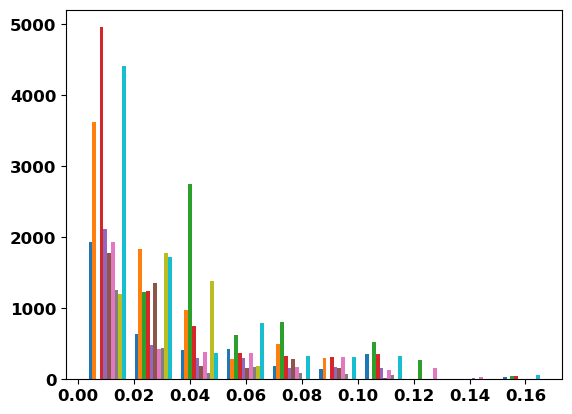

In [53]:
plt.hist(prob)

In [1]:
import os
os.chdir('./cognitive_tests/')

In [6]:
import sys
sys.path.append('../ukb_func')
import icd
import ml_utils
import df_utils
import ukb_utils
import utils
import f3
import plot_results

import pickle
import argparse
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, fbeta_score, RocCurveDisplay, auc, roc_curve, precision_recall_fscore_support, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, roc_auc_score, precision_recall_fscore_support, accuracy_score, balanced_accuracy_score
from lightgbm import LGBMClassifier
from flaml import AutoML

import sys
from datetime import datetime
import pickle
import matplotlib.pyplot as plt

/home/rae330/.conda/envs/pymc_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [68]:
os.getcwd()

'/n/groups/patel/randy/rfb/code/cognitive_tests'

In [15]:
data_modality = 'cognitive_tests'

X = pd.read_parquet(f'../../tidy_data/dementia/{data_modality}/X.parquet')
y = np.load(f'../../tidy_data/dementia/{data_modality}/y.npy')
region_indices = pickle.load(open(f'../../tidy_data/dementia/{data_modality}/region_cv_indices.pickle', 'rb'))

# # Create the argument parser
# parser = argparse.ArgumentParser(
#     description='Run AutoML on chosen feature sets')

# # Add arguments
# # parser.add_argument('njobs', type=str, help='Number of cores')
# parser.add_argument('--experiment', type=str,
#                     help='options: age_only, all_demographics, cognitive_tests_only, demographics_and_cognitive_tests')
# parser.add_argument('--time_budget', type=int, default=3600,
#                     help='options: seconds to allow FLAML to optimize')
# parser.add_argument('--metric', type=str, default='roc_auc',
#                     help='options: roc_auc, f3')
# parser.add_argument('--age_cutoff', type=int, default=None,
#                     help='age cutoff')
# # parser.add_argument('--file_suffix', type=str, default='',
# #                     help='extra information to put in the filename')

# Parse the arguments
# args = parser.parse_args()
experiment = 'demographics_and_cognitive_tests' #args.experiment
time_budget = 1800 #args.time_budget
metric = 'roc_auc' #args.metric
age_cutoff = None #args.age_cutoff
# file_suffix = args.file_suffix

# Specify the directory path
directory_path = f'../../results/dementia/{data_modality}/{experiment}/{metric}/'


if age_cutoff is not None:
    over_age_idx = X['21003-0.0'] >= age_cutoff
    X = X[over_age_idx].reset_index(drop=True)
    y = y[over_age_idx]
    
    # cv indices based on region
    region_lookup = pd.read_csv('../../metadata/coding10.tsv', sep='\t')
    region_indices = ukb_utils.group_assessment_center(X, region_lookup)

    directory_path = f'{directory_path}/agecutoff_{age_cutoff}'

# check if output folder exists
utils.check_folder_existence(directory_path)

cog_vars = pickle.load(open(f'../../tidy_data/dementia/cognitive_tests/cognitive_columns.pkl', 'rb'))
if experiment == 'age_only':
    X = X.loc[:, ['21003-0.0']]
    time_budget = 200
elif experiment == 'all_demographics':
    X = X.loc[:, df_utils.pull_columns_by_prefix(X, ['21003-0.0', '31-0.0', 'apoe', 'max_educ_complete', '845-0.0', '21000-0.0']).columns.tolist()]
    time_budget = 250
elif experiment == 'cognitive_tests_only':
    X = X.loc[:, cog_vars]
    time_budget = 550
elif experiment == 'demographics_and_cognitive_tests':
    X = X.loc[:, df_utils.pull_columns_by_prefix(X, ['21003-0.0', '31-0.0', 'apoe', 'max_educ_complete', '845-0.0', '21000-0.0']).columns.tolist() + cog_vars]
    time_budget = 600

if age_cutoff == 65:
    print('Modifying time budget by dividing by 3 for age cutoff of 65') 
    time_budget = time_budget/3

print(f'Running {experiment} experiment, autoML time budget of {time_budget} seconds, {metric} as the metric, and an age cutoff of {age_cutoff} years')

if metric == 'roc_auc':
    pass
elif metric == 'f3':
    metric = f3.f3_metric

train_labels_l = []
train_probas_l = []

test_labels_l = []
test_probas_l = []

train_res_l = []
test_res_l = []

print(f'Dimensionality of the dataset: {X.shape}')

for i,r in enumerate(list(region_indices.keys())):
    current_time = datetime.now().time()
    print(f'{r}, {current_time}')
    indices = region_indices[r]
    X_test = X.iloc[indices, :]
    y_test = y[indices]

    # Create a mask to select all indices not in indices
    mask = np.ones(len(y), dtype=bool)
    mask[indices] = False

    # Step 4: Subset the main array using the mask
    X_train = X.iloc[mask, :]
    y_train = y[mask]
    print('made train and test split')

    automl = AutoML()
    automl.fit(X_train, y_train, task="classification", time_budget=time_budget, metric=metric, n_jobs=-1,
                    max_iter=None, early_stop=True, append_log=True, log_file_name=f'{directory_path}/results_log_{i}.json')

    print('Done fitting model')

    series_automl = pd.Series([automl.best_estimator, automl.best_config], index=['model', 'hyperparams'])

    train_probas = automl.predict_proba(X_train)[:,1]

    # if metric == 'roc_auc':
    train_res, threshold = ml_utils.calc_results(metric, y_train, train_probas, beta=3)
    # elif metric == f3.f3_metric:
    #     train_res, threshold = ml_utils.calc_results(y_train, train_probas, beta=3)

    train_res = pd.concat([series_automl, train_res])
    train_res_l.append(train_res)
    train_labels_l.append(y_train)
    train_probas_l.append(train_probas)

    test_probas = automl.predict_proba(X_test)[:,1]

    # if metric == 'roc_auc':
    test_res = ml_utils.calc_results(metric, y_test, test_probas, beta=3, threshold=threshold)
    # elif metric == f3.f3_metric:
    #     test_res = ml_utils.calc_results(y_test, test_probas, threshold=threshold, beta=3)

    test_res = pd.concat([series_automl, test_res])
    test_res_l.append(test_res)
    test_labels_l.append(y_test)
    test_probas_l.append(test_probas)
    

ml_utils.save_labels_probas(directory_path, train_labels_l, train_probas_l, test_labels_l, test_probas_l)

train_df = pd.concat(train_res_l, axis=1).T
train_df.to_csv(f'{directory_path}/training_results.csv')

test_df = pd.concat(test_res_l, axis=1).T
test_df.to_csv(f'{directory_path}/test_results.csv')


plot_title = {'age_only': 'Age Only', 'all_demographics': 'All Demographics',
                'cognitive_tests_only': 'All Cognitive Tests', 'demographics_and_cognitive_tests': 'All Demographics + Cognitive Tests'}
fig = plot_results.mean_roc_curve(true_labels_list=test_labels_l, predicted_probs_list=test_probas_l,
                        individual_label='Region fold', title=plot_title[experiment])
fig.savefig(f'{directory_path}/roc_curve.pdf')

Running demographics_and_cognitive_tests experiment, autoML time budget of 5500 seconds, roc_auc as the metric, and an age cutoff of None years
Dimensionality of the dataset: (213106, 122)
East Midlands, 16:56:48.564653
made train and test split
[flaml.automl.logger: 06-14 16:56:52] {1680} INFO - task = classification
[flaml.automl.logger: 06-14 16:56:52] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 06-14 16:56:53] {1789} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 06-14 16:56:53] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 06-14 16:56:53] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-14 16:56:53] {2345} INFO - Estimated sufficient time budget=19895s. Estimated necessary time budget=488s.
[flaml.automl.logger: 06-14 16:56:53] {2392} INFO -  at 5.2s,	estimator lgbm's best error=0.1717,	best estimator lgbm's best error=0

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7f7107f128a0>>
Traceback (most recent call last):
  File "/home/rae330/.conda/envs/pymc_env/lib/python3.12/site-packages/xgboost/core.py", line 589, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument

KeyboardInterrupt: 


: 

: 

In [ ]:
# Strings to search for
search_strings = ['42019-0', '42021-0', '42023-0', '42025-0', '131037-0', '130837-0', '130839-0', '130841-0', '130843-0']#, '41280']

# Identify column names that start with any of the search strings
matching_columns = [col for col in acd.columns if any(col.startswith(s) for s in search_strings)]

# Filter rows where at least one value in the subset of columns is not NA
source_report_df = acd[acd[matching_columns].isin([1,2,11,12,21,22]).any(axis=1)]

In [ ]:
import pandas as pd

# Step 2: Define the prefixes
prefixes = ['S720', 'S721', 'S722']

# Step 3: Define a function that checks if a cell starts with any of the prefixes
def starts_with_prefixes(cell):
    return any(str(cell).startswith(prefix) for prefix in prefixes)

# Step 4: Apply the function to each cell in the DataFrame
result = icd10_df.applymap(starts_with_prefixes)

# Step 5: Get the row, column indices where the condition is True
# indices = result.stack()[result.stack()].index.tolist()
indices = [(row, icd10_df.columns.get_loc(col)) for row, col in result.stack()[result.stack()].index.tolist()]

# Step 6: Retrieve the values corresponding to the indices
values = [icd10_df.iat[row, col] for row, col in indices]

# values = [icd10_df.iat[row, icd10_df.columns.get_loc(col)] for row, col in indices]
dates = [icd10_date_df.iat[row, col] for row, col in indices] 
# Display the result
# print("DataFrame:\n", df)
# print("\nBoolean DataFrame:\n", result)
# print("\nRow, Column Indices where condition is True:\n", indices)


/tmp/ipykernel_29462/519185724.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result = icd10_df.applymap(starts_with_prefixes)


In [ ]:
len(set(rowidx)), len(indices)

(5490, 5727)

In [ ]:
sum(pd.Series(values) < pd.to_datetime('2006-10-01'))

151

In [ ]:
proteins = pd.read_csv('../tidy_data/proteomics/protein_colnames.txt', header=None)
proteins = proteins[0].tolist()
proteins[:10]

['2738-0',
 '2737-0',
 '2736-0',
 '2735-0',
 '2734-0',
 '2733-0',
 '2732-0',
 '2731-0',
 '2739-0',
 '2740-0']

In [ ]:
prot_annot = pd.read_csv('../tidy_data/proteomics/coding143.tsv',
                                          sep='\t')
prot_annot[['protein_id', 'meaning']] = prot_annot['meaning'].str.split(';', expand=True)

In [ ]:
# NEFL, GFAP, GDF15, BCAN, LTBP2, NPTXR, EDA2R, NTproBNP, EGFR, HPGDS and CST5


prot_annot[prot_annot.protein_id.str.contains('GFAP|NEFL|GDF15|BCAN|LTBP2|NPTXR|EDA2R|NTproBNP|EGFR|HPGDS|CST5')].coding.tolist()

[242, 711, 883, 902, 1137, 1141, 1288, 1631, 1840, 1896, 1912]

In [ ]:
death_icd_df.shape

(2317, 537)

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st

round_num = 3
paths = ['demographics/dementia/test_noAge_bootstrap_results.parquet', 'demographics/dementia/test_bootstrap_results.parquet', 'proteomics/dementia/wo_demo/', 'proteomics/dementia/with_demo/']
names = ['Demo, No Age', 'Demographics', 'Proteins', 'Proteins+Demo', ]

final_rows = []
for p, name in zip(paths, names):
    if 'demographics' not in p:
        rows = []
        res_path = f'../tidy_data/{p}/test/'
        res = [file for file in os.listdir(res_path) if 'results' in file]
        for f in res:
            df = pd.read_parquet(f'{res_path}/{f}')
            df = df.sort_values(by='auroc', ascending=False)
            # rows.append(df.iloc[0, :])
            # rows.append(df)
            rows.append(df.iloc[:(int(df.shape[0] / 20)), :])
        # res_df = pd.concat(rows, axis=1).T
        df = pd.concat(rows, axis=0)

    else:
        df = pd.read_parquet(f'../tidy_data/{p}')
        df = df.sort_values(by='auroc', ascending=False)
        df = df.iloc[:(int(df.shape[0] / 20)), :]

    metric_cols = ['auroc', 'balanced_acc', 'prec_neg', 'prec_pos', 'rec_neg', 'rec_pos', 'f1_neg', 'f1_pos']
    row = []
    row.append(name)
    for i,mc in enumerate(metric_cols):
        mean = np.mean(df[mc])
        low_bound, up_bound = st.t.interval(confidence=0.95, df=len(df)-1, loc=np.mean(df[mc]), scale=np.std(df[mc]))
        row.extend([f'{round(mean,round_num)} ({round(low_bound,round_num)}-{round(up_bound,round_num)})'])

    final_rows.append(pd.Series(row))

guo_row1 = pd.Series(['Guo (P)', '0.841 (0.823-0.86)', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A'])
guo_row2 = pd.Series(['Guo (P+D)', '0.908 (0.889-0.927)', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A'])
# guo_row2 = pd.Series(['Guo (P+D+C)', '0.913 (0.911-0.915)', 'NA', 'NA', '0.117 (0.101-0.133)', 'NA', '0.827 (0.758-0.896)', 'NA', '0.205 (0.179-0.231)'])
final_rows.extend([guo_row1, guo_row2])
res_df = pd.concat(final_rows, axis=1).T

In [ ]:
res_df.columns = ['Features', 'AUROC', 'Balanced Acc.', 'Precision Neg.', 'Precision', 'Recall Neg.', 'Recall', 'F1 Neg.', 'F1']
res_df.loc[:, ['Features', 'AUROC', 'Precision', 'Recall', 'F1']].to_latex('dementia.tex', index=False, index_names=False)

In [ ]:
'../tidy_data/proteomics/hip_fracture/wo_demo/test/'

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import os

round_num = 3
paths = ['demographics/hip_fracture/test_0_bootstrap_results.parquet', 
         'proteomics/hip_fracture/wo_demo/', 'proteomics/hip_fracture/with_demo/']
names = ['Demographics',
         'Proteins', 'Proteins+Demo', ]

final_rows = []
for p, name in zip(paths, names):
    if 'demographics' not in p:
        rows = []
        res_path = f'../tidy_data/{p}/test/'
        res = [file for file in os.listdir(res_path) if 'results' in file]
        for f in res:
            df = pd.read_parquet(f'{res_path}/{f}')
            df = df.sort_values(by='auroc', ascending=False)
            # rows.append(df.iloc[0, :])
            # rows.append(df)
            rows.append(df.iloc[:(int(df.shape[0] / 20)), :])
        # res_df = pd.concat(rows, axis=1).T
        df = pd.concat(rows, axis=0)

    else:
        df = pd.read_parquet(f'../tidy_data/{p}')
        df = df.sort_values(by='auroc', ascending=False)
        df = df.iloc[:(int(df.shape[0] / 20)), :]

    metric_cols = ['auroc', 'balanced_acc', 'prec_neg', 'prec_pos', 'rec_neg', 'rec_pos', 'f1_neg', 'f1_pos']
    row = []
    row.append(name)
    for i,mc in enumerate(metric_cols):
        mean = np.mean(df[mc])
        low_bound, up_bound = st.t.interval(confidence=0.95, df=len(df)-1, loc=np.mean(df[mc]), scale=np.std(df[mc]))
        row.extend([f'{round(mean,round_num)} ({round(low_bound,round_num)}-{round(up_bound,round_num)})'])

    final_rows.append(pd.Series(row))

austin_row = pd.Series(['Austin', '0.765', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A'])
final_rows.extend([austin_row])
res_df = pd.concat(final_rows, axis=1).T

FileNotFoundError: [Errno 2] No such file or directory: '../tidy_data/demographics/hip_fracture/test_0_bootstrap_results.parquet'

In [ ]:
res_df.columns = ['Features', 'AUROC', 'Balanced Acc.', 'Precision Neg.', 'Precision', 'Recall Neg.', 'Recall', 'F1 Neg.', 'F1']
res_df

,Features,AUROC,Balanced Acc.,Precision Neg.,Precision,Recall Neg.,Recall,F1 Neg.,F1
0,Demographics,0.597 (0.58-0.613),0.513 (0.497-0.529),0.987 (0.985-0.99),0.039 (0.007-0.071),0.988 (0.985-0.99),0.038 (0.007-0.07),0.988 (0.986-0.989),0.039 (0.008-0.07)
1,Proteins,0.672 (0.595-0.749),0.62 (0.547-0.694),0.992 (0.988-0.996),0.022 (0.012-0.031),0.652 (0.441-0.863),0.589 (0.287-0.891),0.782 (0.635-0.929),0.042 (0.024-0.059)
2,Proteins+Demo,0.64 (0.576-0.703),0.597 (0.534-0.659),0.991 (0.988-0.994),0.022 (0.012-0.032),0.697 (0.472-0.922),0.496 (0.21-0.783),0.813 (0.654-0.971),0.041 (0.026-0.057)
3,Austin,0.765,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [ ]:
res_df.loc[:, ['Features', 'AUROC', 'Precision', 'Recall', 'F1']].to_latex('hip_fracture.tex', index=False, index_names=False)

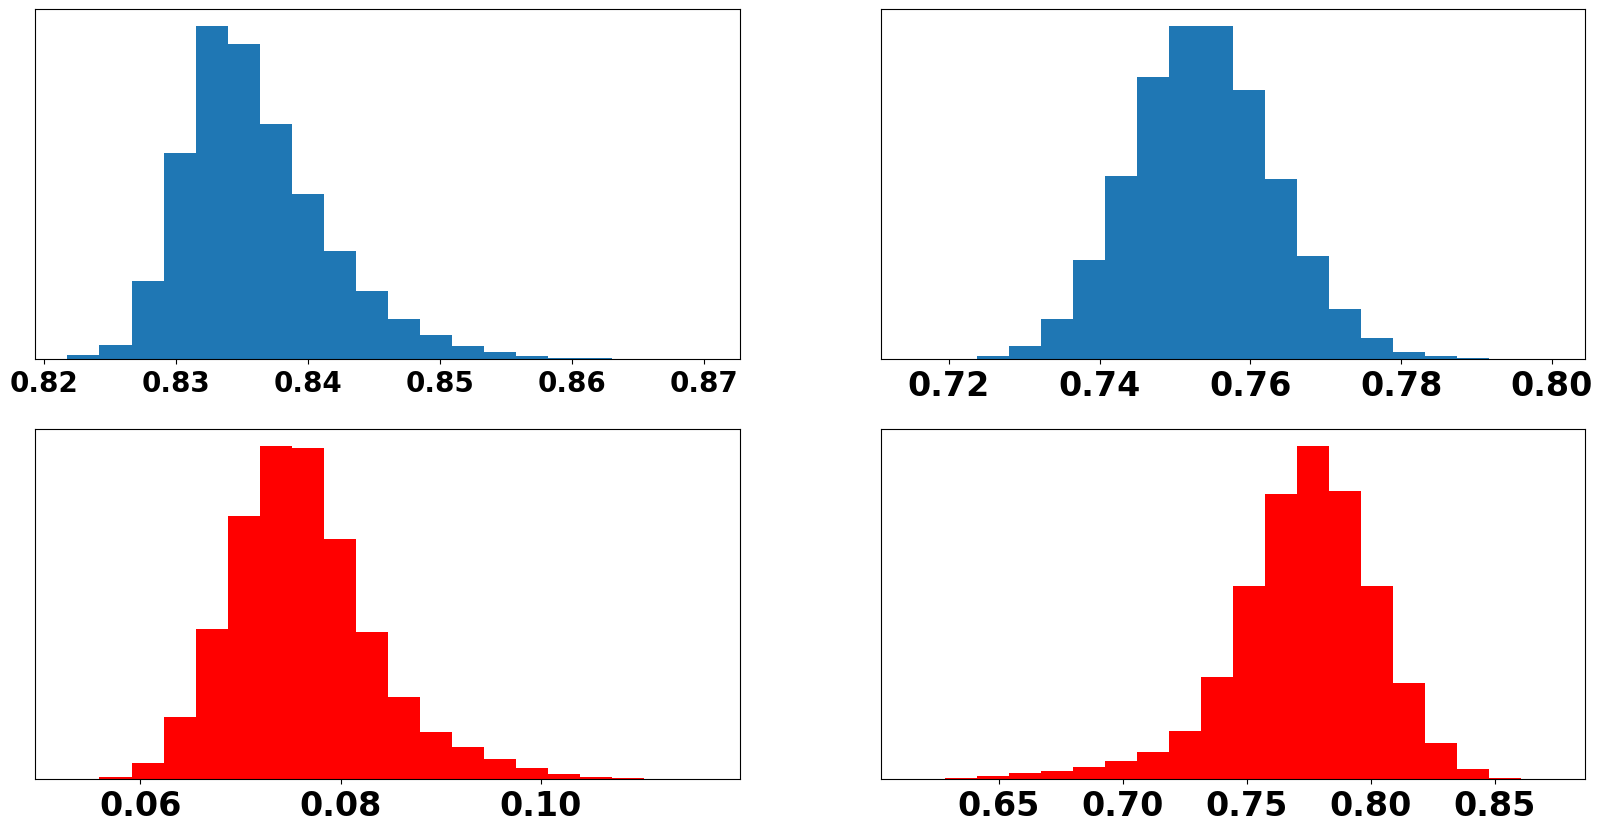

In [ ]:


# Set font properties
plt.rcParams.update({
    'font.size': 24,       # Set font size
    'font.weight': 'bold'  # Set font weight to bold
})

topleft = 'auroc'
topright = 'balanced_acc'
botleft = 'prec_pos'
botright = 'rec_pos'
num_bins = 20

# using tuple unpacking for multiple Axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

ax1.hist(df[topleft], density=True, bins=num_bins)
ax1.tick_params(axis='x', labelsize=20) 
ax2.hist(df[topright], density=True, bins=num_bins)
ax3.hist(df[botleft], density=True, bins=num_bins, color='red')
ax4.hist(df[botright], density=True, bins=num_bins, color='red')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_yticks([])

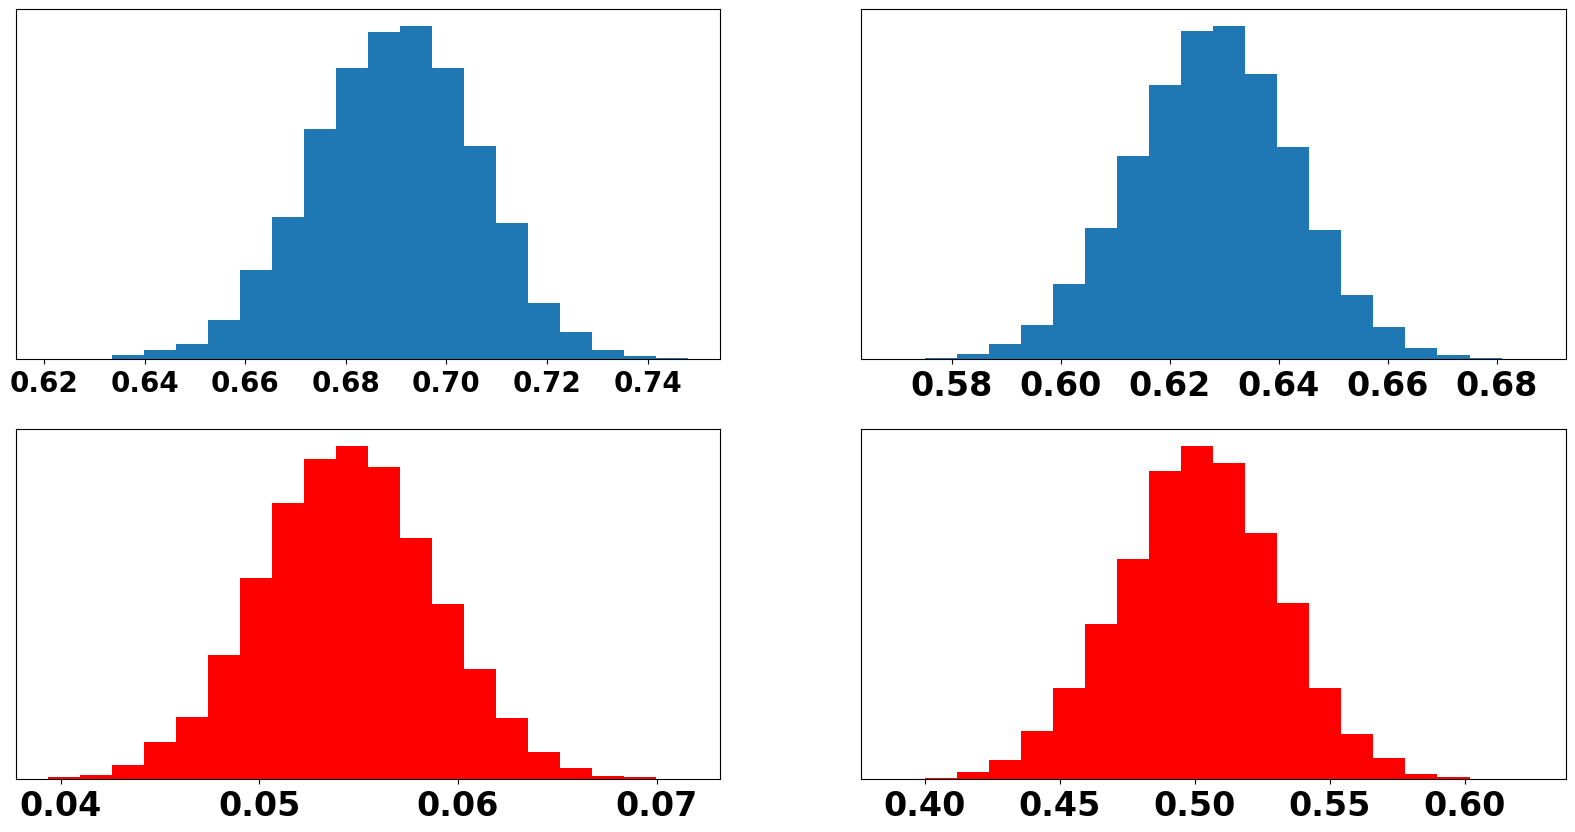

In [ ]:
df = pd.read_parquet('../tidy_data/demographics/test_noAge_bootstrap_results.parquet')

# Set font properties
plt.rcParams.update({
    'font.size': 24,       # Set font size
    'font.weight': 'bold'  # Set font weight to bold
})

topleft = 'auroc'
topright = 'balanced_acc'
botleft = 'prec_pos'
botright = 'rec_pos'
num_bins = 20

# using tuple unpacking for multiple Axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

ax1.hist(df[topleft], density=True, bins=num_bins)
ax1.tick_params(axis='x', labelsize=20) 
ax2.hist(df[topright], density=True, bins=num_bins)
ax3.hist(df[botleft], density=True, bins=num_bins, color='red')
ax4.hist(df[botright], density=True, bins=num_bins, color='red')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_yticks([])

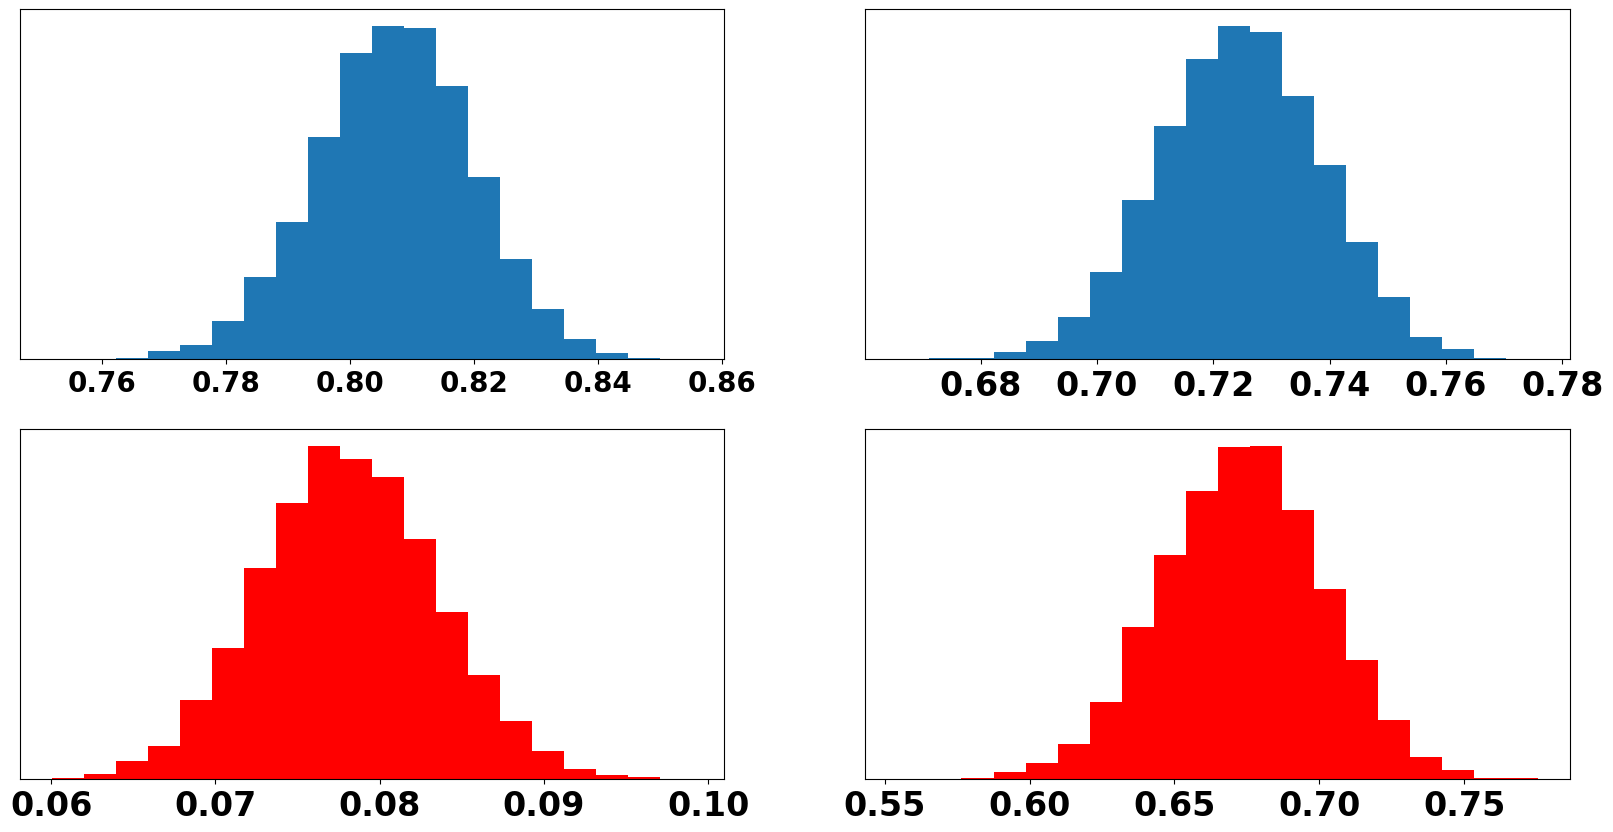

In [ ]:
df = pd.read_parquet('../tidy_data/demographics/test_bootstrap_results.parquet')

# Set font properties
plt.rcParams.update({
    'font.size': 24,       # Set font size
    'font.weight': 'bold'  # Set font weight to bold
})

topleft = 'auroc'
topright = 'balanced_acc'
botleft = 'prec_pos'
botright = 'rec_pos'
num_bins = 20

# using tuple unpacking for multiple Axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

ax1.hist(df[topleft], density=True, bins=num_bins)
ax1.tick_params(axis='x', labelsize=20) 
ax2.hist(df[topright], density=True, bins=num_bins)
ax3.hist(df[botleft], density=True, bins=num_bins, color='red')
ax4.hist(df[botright], density=True, bins=num_bins, color='red')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_yticks([])